In [1]:
import os
import dataset

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage.io import imread_collection
from skimage.transform import resize
from skimage.exposure import equalize_adapthist
from sklearn.metrics import ConfusionMatrixDisplay

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from tensorflow.keras.models import load_model

In [2]:
train_data = pd.read_csv('dataset/Train.csv')
test_data = pd.read_csv('dataset/Test.csv')
data = pd.concat((train_data, test_data))

In [3]:
examples = list(imread_collection('dataset/Meta/*.png'))

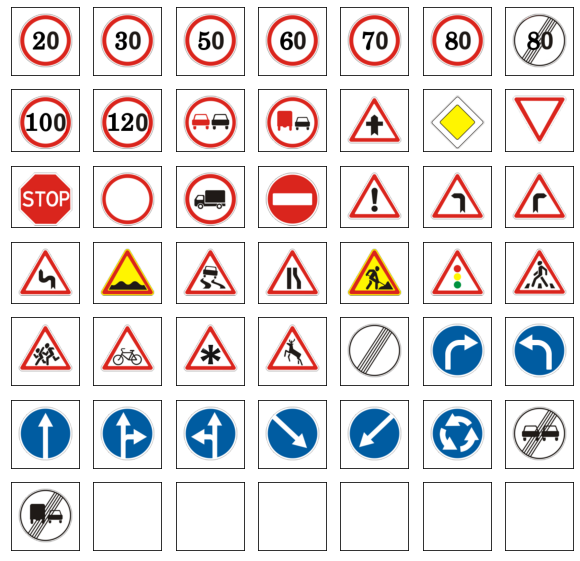

In [4]:
fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(7, 7), axes_pad=0.2)
for ax, im in zip(grid, examples): 
    ax.imshow(np.pad(im, ((15, 15), (15, 15), (0, 0))))
for ax in grid: 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [7]:
im_names = ['dataset/' + s for s in data[data['Path'].str.startswith('Train')]['Path'].sample(16)]
images = list(imread_collection(im_names))

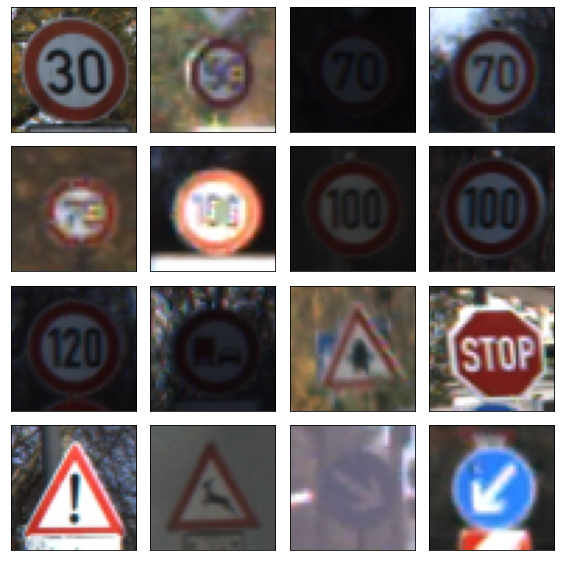

In [8]:
fig2 = plt.figure(figsize=(20, 10))
grid2 = ImageGrid(fig2, 111, nrows_ncols=(4, 4), axes_pad=0.2)
for ax2, im2 in zip(grid2, images): 
    ax2.imshow(resize(im2, (45, 45)))
for ax2 in grid2: 
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

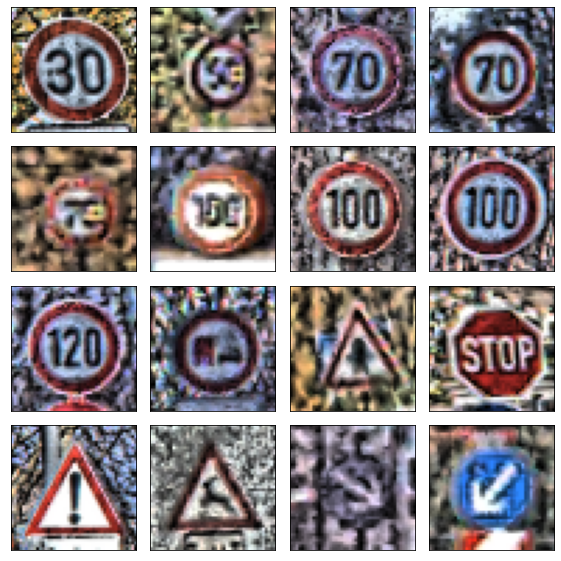

In [9]:
fig3 = plt.figure(figsize=(20, 10))
grid3 = ImageGrid(fig3, 111, nrows_ncols=(4, 4), axes_pad=0.2)
for ax3, im3 in zip(grid3, images): 
    resized_img = resize(im3, (45, 45))
    ax3.imshow(equalize_adapthist(resized_img, clip_limit=0.1))
for ax3 in grid3: 
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)

<AxesSubplot:>

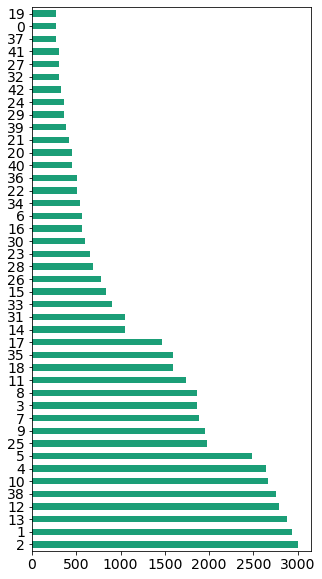

In [11]:
data['ClassId'].value_counts().plot.barh(figsize=(5, 10), rot=0, fontsize=14, colormap='Dark2')

In [2]:
model_name = 'tsatlee-poinder'
model = load_model(f'models/{model_name}')
test = dataset.test(64)
model.evaluate(test)

Found 12630 images belonging to 43 classes.
198/198 [==============================] - 65s 299ms/step - loss: 0.1360 - accuracy: 0.9611


[0.1359599083662033, 0.9611243009567261]

In [ ]:
y_pred = []
y_true = []
for imgbatch, labelbatch in test: 
    preds = np.argmax(model.predict(imgbatch), axis=1)
    trues = np.argmax(labelbatch, axis=1)
    y_pred.extend(preds)
    y_true.extend(trues)

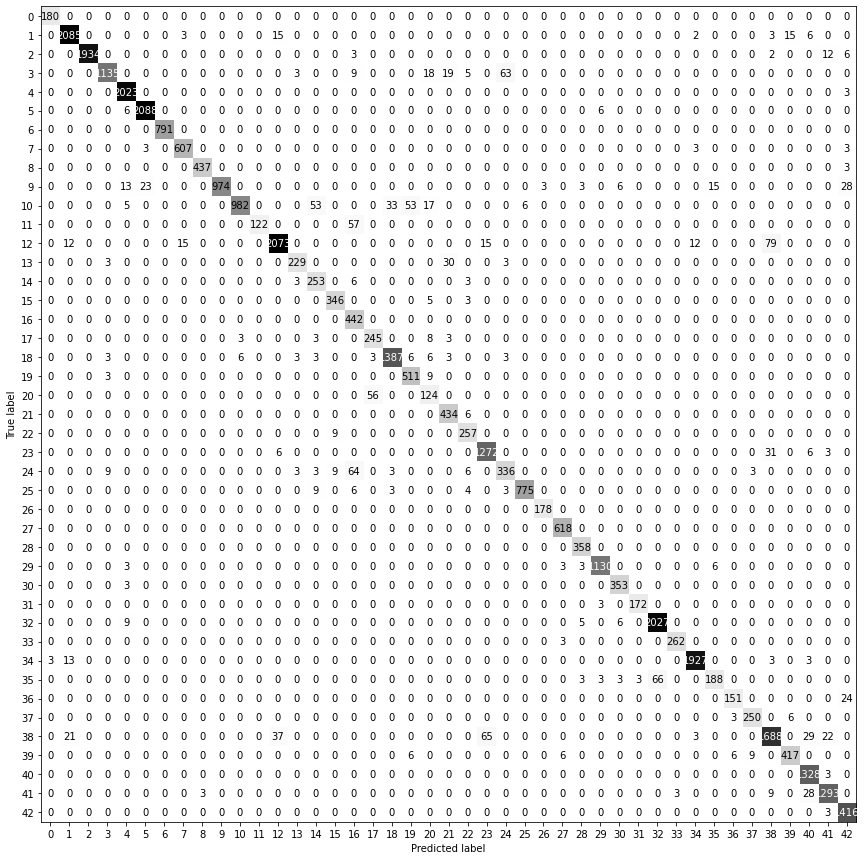

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, colorbar=False, ax=ax, cmap='binary')